In [162]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import requests
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime as dt

In [163]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/layoffs_cleaned.csv'
layoffs_df = pd.read_csv(url)

In [164]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/salaries_cleaned.csv'
salaries_df = pd.read_csv(url)

In [165]:
# View dataframe info
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               62642 non-null  int64  
 1   timestamp                62642 non-null  object 
 2   date                     62642 non-null  object 
 3   company                  62637 non-null  object 
 4   level                    62523 non-null  object 
 5   title                    62642 non-null  object 
 6   totalyearlycompensation  62642 non-null  int64  
 7   location                 62642 non-null  object 
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  yearsofexperience        62642 non-null  float64
 11  yearsatcompany           62642 non-null  float64
 12  basesalary               62642 non-null  int64  
 13  stockgrantvalue          62642 non-null  int64  
 14  bonus                 

In [166]:
# Display dataframe
salaries_df = salaries_df.drop(columns='Unnamed: 0')
salaries_df.head()

,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown
1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown
2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown
3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown
4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown


In [167]:
# Add columns for month and year separated
salaries_df['year'] = pd.DatetimeIndex(salaries_df['date']).year
salaries_df['month'] = pd.DatetimeIndex(salaries_df['date']).month
salaries_df.head()

,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education,year,month
0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown,2017,6
1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown,2017,6
2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown,2017,6
3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown,2017,6
4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown,2017,6


##  Data Exploration

In [168]:
# Average pay by year
salaries_df.groupby('year').mean()['totalyearlycompensation']

year
2017    249300.000000
2018    246749.552246
2019    231922.691930
2020    213888.791447
2021    205980.876766
Name: totalyearlycompensation, dtype: float64

In [169]:
# Job titles and counts
salaries_df['title'].value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

In [170]:
# Average salary by job title
salaries_df.groupby('title').mean()['totalyearlycompensation']

title
Business Analyst                129727.683616
Data Scientist                  203656.710628
Hardware Engineer               213655.000000
Human Resources                 178711.538462
Management Consultant           162795.081967
Marketing                       198971.830986
Mechanical Engineer             158442.857143
Product Designer                207637.203166
Product Manager                 257813.396105
Recruiter                       155580.931264
Sales                           214273.318872
Software Engineer               205403.992287
Software Engineering Manager    354635.752312
Solution Architect              212736.387208
Technical Program Manager       237099.927589
Name: totalyearlycompensation, dtype: float64

In [171]:
# Average salary by Gender
salary_gender = salaries_df.groupby(['gender']).totalyearlycompensation.mean()
salary_gender

gender
Female     195119.588513
Male       212446.977928
Other      232347.500000
Unknown    230598.485236
Name: totalyearlycompensation, dtype: float64

<Axes: xlabel='gender'>

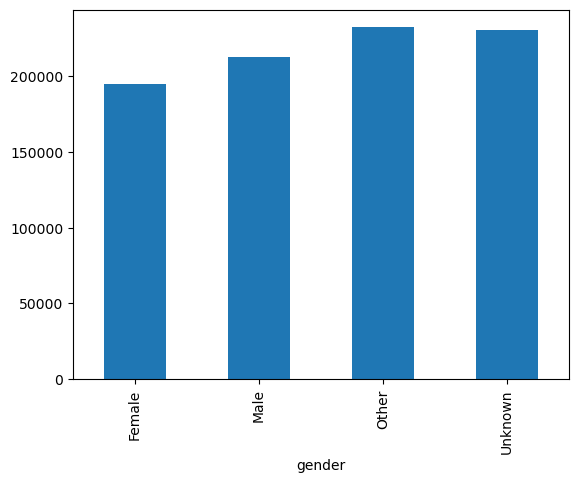

In [172]:
salary_gender.plot(kind='bar')

In [173]:
# Average salary by Race
salary_race = salaries_df.groupby(['Race']).totalyearlycompensation.mean()
salary_race

Race
Asian          193324.753653
Black          181324.637681
Hispanic       189701.505757
Two Or More    204651.741294
Unknown        226604.277160
White          206293.700199
Name: totalyearlycompensation, dtype: float64

<Axes: xlabel='Race'>

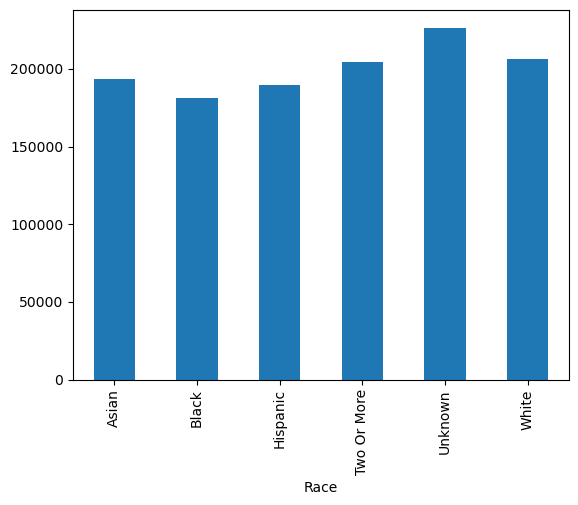

In [174]:
salary_race.plot(kind='bar')

In [175]:
salary_education = salaries_df.groupby(['Education']).totalyearlycompensation.mean()
salary_education

Education
Bachelor's Degree    177845.409095
Highschool           187731.250000
Master's Degree      220731.076603
PhD                  291865.531415
Some College         210121.126761
Unknown              225566.187593
Name: totalyearlycompensation, dtype: float64

<Axes: xlabel='Education'>

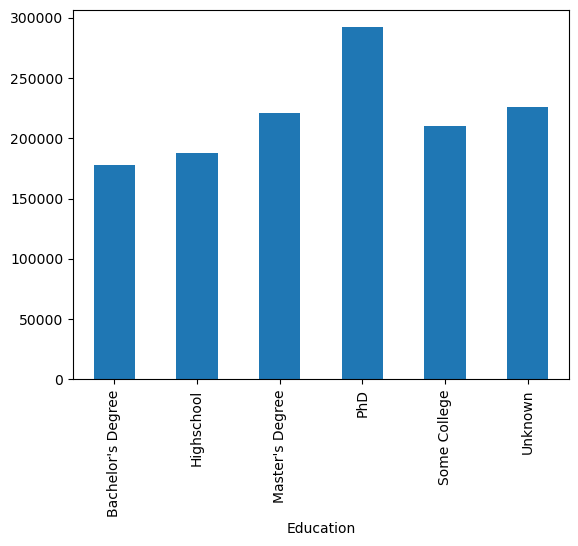

In [176]:
salary_education.plot(kind='bar')

In [177]:
year_gender_comp = salaries_df.groupby(['year', 'gender'], as_index=False).totalyearlycompensation.mean()
year_gender_comp

,year,gender,totalyearlycompensation
0,2017,Unknown,249300.000000
1,2018,Female,206481.012658
2,2018,Male,248057.887281
3,2018,Other,224454.545455
4,2018,Unknown,248776.004973
5,2019,Female,213834.366696
6,2019,Male,229828.334397
7,2019,Other,237898.437500
8,2019,Unknown,249121.602289
9,2020,Female,190519.317786


In [178]:
year_edu_comp = salaries_df.groupby(['year', 'Education'], as_index=False).totalyearlycompensation.mean()
year_edu_comp

,year,Education,totalyearlycompensation
0,2017,PhD,320000.000000
1,2017,Unknown,248915.760870
2,2018,PhD,182000.000000
3,2018,Unknown,246782.816851
4,2019,Bachelor's Degree,138750.000000
5,2019,Master's Degree,237439.516129
6,2019,PhD,301982.608696
7,2019,Unknown,230781.038156
8,2020,Bachelor's Degree,182366.334489
9,2020,Highschool,186300.970874


## Who are the top salaried companies for 2017 to 2019?

<Axes: title={'center': 'Top 20 Highest Paying Companies'}, xlabel='Average Annual Compensation (in Millions, $)', ylabel='Company'>

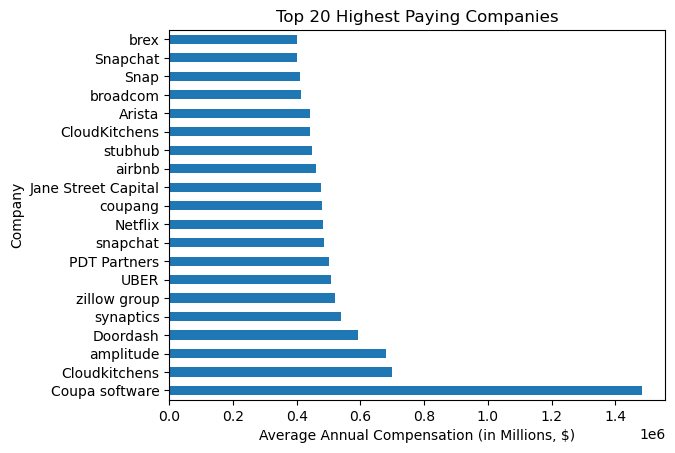

In [179]:
# Graph Top 20 Highest Paying Companies (on Average)
mean = salaries_df.groupby('company').mean()['totalyearlycompensation']
ordered_mean = mean.sort_values(ascending=False)[:20]
top_paying = ordered_mean.plot(kind='barh')
top_paying.set_title("Top 20 Highest Paying Companies")
top_paying.set_xlabel("Average Annual Compensation (in Millions, $)")
top_paying.set_ylabel("Company")
top_paying

In [180]:
# Finding the mean of the salary ranges within a company 
salary_mean = salaries_df.groupby('company').mean()['totalyearlycompensation']

# Assemble the information into a DataFrame
salary_summary = pd.DataFrame({"Mean Salary": salary_mean})

salary_summary

,Mean Salary
company,
10x Genomics,1.933333e+05
23andMe,1.534286e+05
2U,1.455714e+05
3M,1.188571e+05
3m,1.156667e+05
7-Eleven,1.267500e+05
7-eleven,8.000000e+04
8x8,2.965714e+05
ABB,9.442857e+04


In [181]:
# Update formatting so it is displayed in salary format (in $)
salary_summary_format = salary_summary.loc[:, "Mean Salary"] ='$'+ salary_summary["Mean Salary"].map('{:,.0f}'.format)
salary_summary_format

company
10x Genomics                                 $193,333
23andMe                                      $153,429
2U                                           $145,571
3M                                           $118,857
3m                                           $115,667
7-Eleven                                     $126,750
7-eleven                                      $80,000
8x8                                          $296,571
ABB                                           $94,429
ADP                                          $126,723
AIG                                          $135,625
AMAZON                                       $160,750
AMD                                          $173,246
AMazon                                       $186,667
ANSYS                                        $115,500
APPLE                                        $213,000
ARM                                          $248,000
ARUBA                                        $245,000
ASML                

In [182]:
# Finding the mean of the salary ranges within a company 
salary_mean = salaries_df.groupby('company').mean()['totalyearlycompensation']

# Assemble the information into a DataFrame
salary_summary = pd.DataFrame({"Mean Salary": salary_mean})

# Update formatting so it is displayed in salary format (in $)
salary_summary.loc[:, "Mean Salary"] ='$'+ salary_summary["Mean Salary"].map('{:,.0f}'.format)


# Display DataFrame
salary_summary

,Mean Salary
company,
10x Genomics,"$193,333"
23andMe,"$153,429"
2U,"$145,571"
3M,"$118,857"
3m,"$115,667"
7-Eleven,"$126,750"
7-eleven,"$80,000"
8x8,"$296,571"
ABB,"$94,429"


<Axes: xlabel='company'>

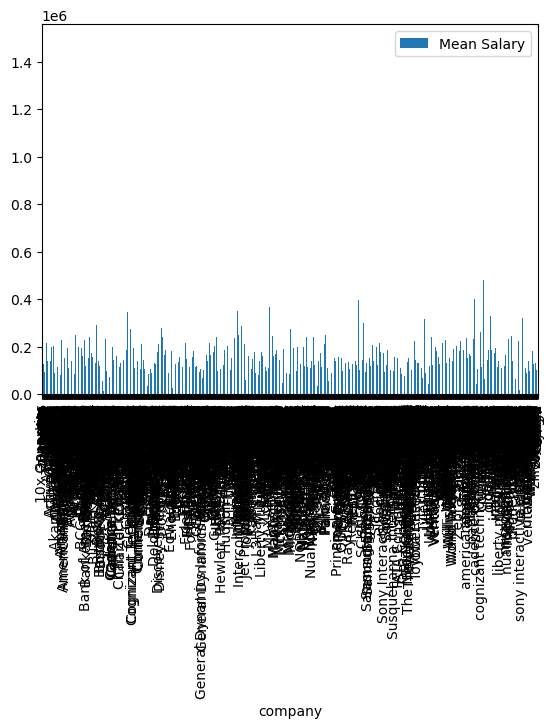

In [183]:
# Finding the mean of the salary ranges within a company 
salary_mean2 = salaries_df.groupby('company').mean()['totalyearlycompensation']

# Assemble the information into a DataFrame
salary_summary2 = pd.DataFrame({"Mean Salary": salary_mean2})

salary_summary2.plot(kind='bar')

<Axes: xlabel='location'>

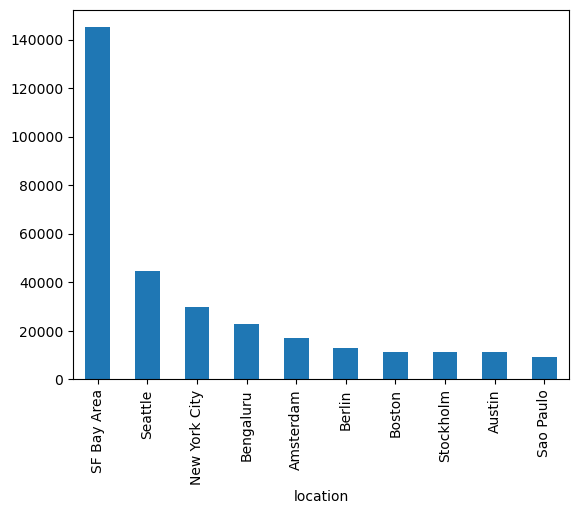

In [184]:
# Number of people laid off by city
layoffs_city_graph = layoffs_df.groupby('location').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='bar')
layoffs_city_graph

## Layoff Data

In [185]:
# Display dataframe
layoffs_df = layoffs_df.drop(columns='Unnamed: 0')
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States


In [186]:
# Add columns for month and year separated
layoffs_df['year'] = pd.DatetimeIndex(layoffs_df['date']).year
layoffs_df['month'] = pd.DatetimeIndex(layoffs_df['date']).month
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,year,month
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States,2023.0,4.0
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia,2023.0,4.0
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States,2023.0,4.0
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States,2023.0,4.0
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States,2023.0,4.0


In [187]:
# Number of people laid off each year
layoffs_year = layoffs_df.groupby('year').sum()['total_laid_off']
layoffs_year

year
2020.0     80998
2021.0     15823
2022.0    164511
2023.0    185136
Name: total_laid_off, dtype: int64

<Axes: xlabel='year'>

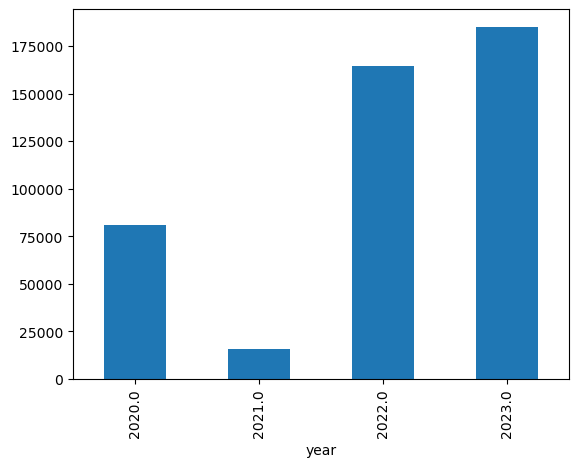

In [188]:
layoffs_year.plot(kind='bar')

In [189]:
import seaborn as sns
import datetime
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'])
layoffs_df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                  int64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
year                          float64
month                         float64
dtype: object

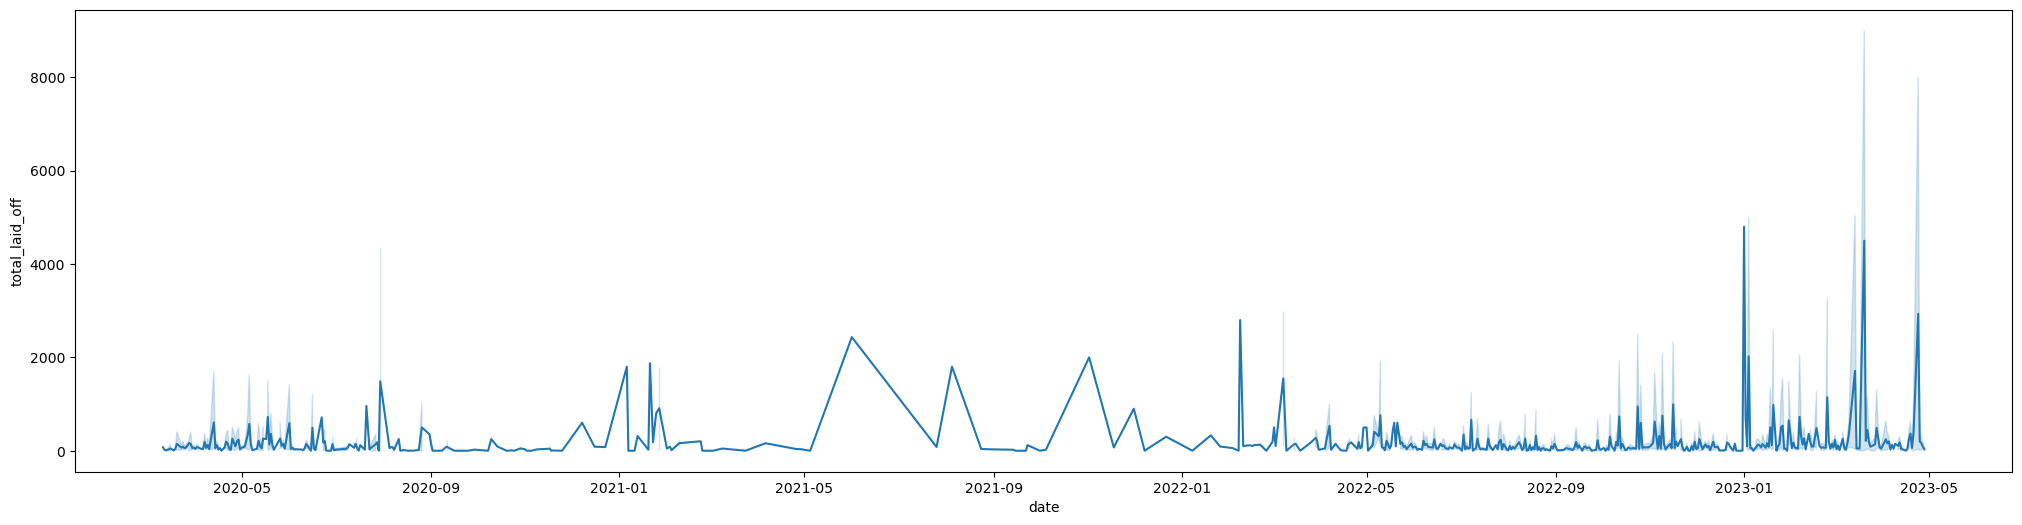

In [190]:
# Time trends for layoffs - Days
plt.figure(figsize=(25,6))
sns.lineplot(x='date',y='total_laid_off',data=layoffs_df)
plt.show()

In [191]:
quarters = layoffs_df.groupby(layoffs_df['date'].dt.to_period('Q'))['total_laid_off'].sum()
quarters

date
2020Q1      9628
2020Q2     60141
2020Q3      9690
2020Q4      1539
2021Q1      7728
2021Q2      2695
2021Q3      2108
2021Q4      3292
2022Q1      9909
2022Q2     35257
2022Q3     35159
2022Q4     84186
2023Q1    166647
2023Q2     18489
Freq: Q-DEC, Name: total_laid_off, dtype: int64

<Axes: xlabel='date'>

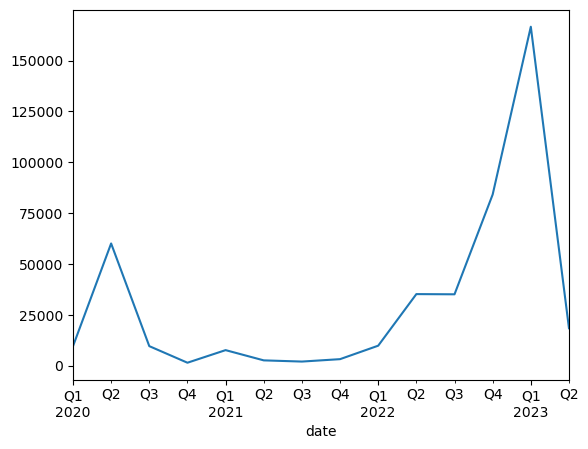

In [192]:
# Time trends for layoffs - Quarters
quarters.plot(kind='line')

In [193]:
# Number of people laid off by Industry
layoffs_ind = layoffs_df.groupby('industry').sum()['total_laid_off']
layoffs_ind

industry
Aerospace           661
Construction       3863
Consumer          56340
Crypto            10785
Data               5899
Education         14169
Energy              802
Finance           30629
Fitness            8898
Food              33962
HR                 5899
Hardware          25208
Healthcare        27674
Infrastructure     5875
Legal               836
Logistics          4026
Manufacturing       158
Marketing         10478
Media              5869
Other             39308
Product            1233
Real Estate       18326
Recruiting         2890
Retail            54825
Sales             13216
Security           6770
Support            3523
Transportation    37692
Travel            17159
Name: total_laid_off, dtype: int64

<Axes: xlabel='industry'>

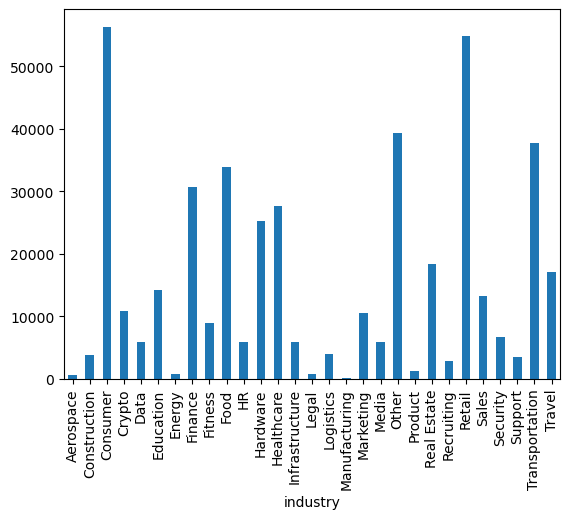

In [194]:
layoffs_ind.plot(kind='bar')

In [195]:
# Number of people laid off by city
layoffs_city = layoffs_df.groupby('location').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_city

location
SF Bay Area         145051
Seattle              44741
New York City        29976
Bengaluru            22733
Amsterdam            17140
Berlin               12903
Boston               11458
Stockholm            11232
Austin               11199
Sao Paulo             9081
London                8707
Boise                 7200
Los Angeles           6665
Chicago               6500
Gurugram              6376
Singapore             5995
Mumbai                5915
Phoenix               5067
Jakarta               4321
Tel Aviv              3546
Philadelphia          3089
Walldorf              3000
Shenzen               2700
Miami                 2690
Toronto               2434
Washington D.C.       2372
San Diego             2321
Columbus              2195
Shanghai              2130
Sydney                2096
New Delhi             1923
Atlanta               1877
Portland              1609
Salt Lake City        1578
Lagos                 1482
Vancouver             1387
Paris              

<Axes: xlabel='location'>

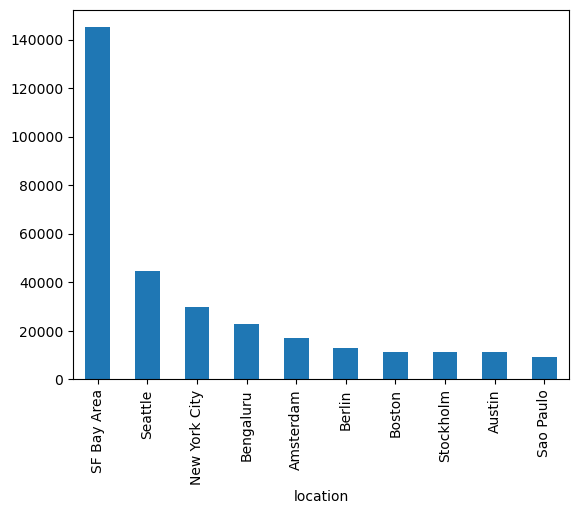

In [196]:
# Number of people laid off by city
layoffs_city_graph = layoffs_df.groupby('location').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='bar')
layoffs_city_graph

In [197]:
# Number of people laid off by country
layoffs_country = layoffs_df.groupby('country').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_country

country
United States           301546
India                    38639
Netherlands              17220
Germany                  16845
Sweden                   11279
Brazil                   10391
United Kingdom            8968
Canada                    6679
China                     6105
Singapore                 5995
Indonesia                 4321
Israel                    3638
Australia                 2989
Nigeria                   1882
France                    1442
United Arab Emirates       995
New Zealand                900
Hong Kong                  730
Austria                    640
Russia                     400
Ireland                    387
Switzerland                362
South Korea                350
Kenya                      349
Saudi Arabia               340
Spain                      339
Estonia                    333
Argentina                  323
Senegal                    300
Mexico                     270
Finland                    250
Denmark                    240


<Axes: xlabel='country'>

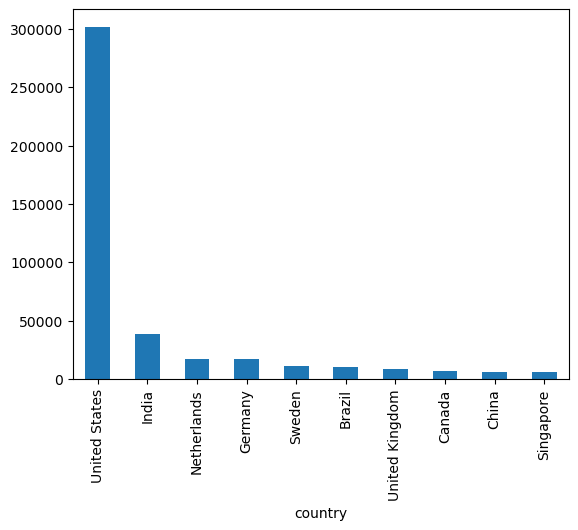

In [198]:
# Number of people laid off by country
layoffs_country_graph = layoffs_df.groupby('country').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='bar')
layoffs_country_graph

In [199]:
# Number of people laid off by company
layoffs_company = layoffs_df.groupby('company').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_company

company
Amazon                           27150
Meta                             21000
Google                           12000
Salesforce                       10090
Philips                          10000
Microsoft                        10000
Ericsson                          8500
Flink                             8000
Uber                              7585
Micron                            7200
Dell                              6650
Booking.com                       4601
Cisco                             4100
Peloton                           4084
Byju's                            4000
Carvana                           4000
Twitter                           3940
IBM                               3900
Better.com                        3900
Groupon                           3800
Bytedance                         3750
Seagate                           3480
Katerra                           3074
SAP                               3000
Swiggy                            2880
Lyft             

<Axes: xlabel='company'>

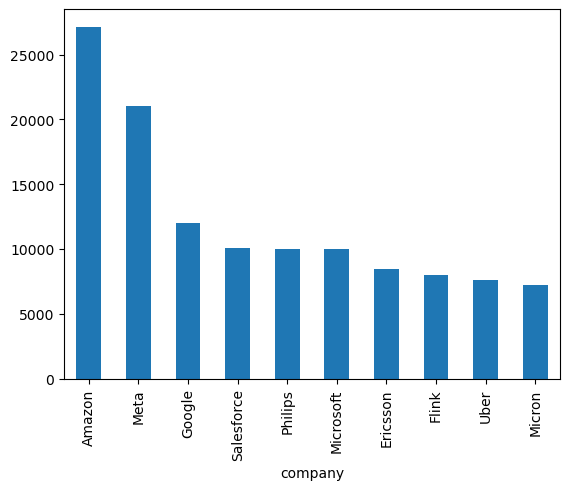

In [200]:
# Number of people laid off by company
layoffs_company_graph = layoffs_df.groupby('company').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='bar')
layoffs_company_graph

In [201]:
# Number of people laid off by stage
layoffs_stage = layoffs_df.groupby('stage').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_stage

stage
Post-IPO          244150
Unknown            42931
Acquired           35605
Series B           24442
Series C           21104
Series D           19610
Series E           13376
Series F           10324
Private Equity      8087
Series H            7344
Series A            6703
Series G            3697
Series J            3570
Series I            2855
Seed                1801
Subsidiary          1094
Name: total_laid_off, dtype: int64

<Axes: xlabel='stage'>

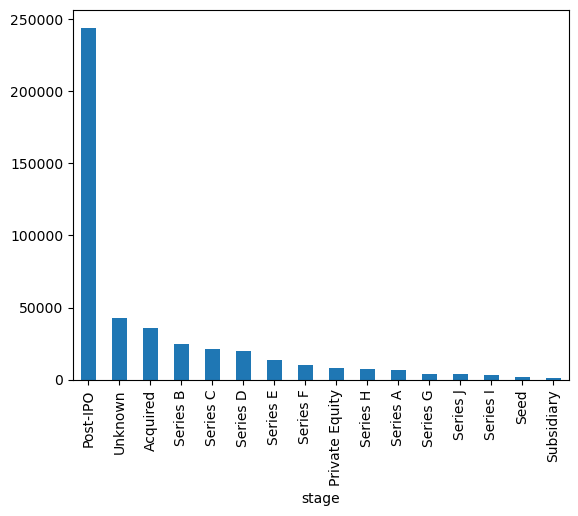

In [202]:
# Number of people laid off by stage
layoffs_stage.plot(kind='bar')

In [203]:
# Companies that folded 
layoffs_stage = layoffs_df.groupby('stage').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_stage

stage
Post-IPO          244150
Unknown            42931
Acquired           35605
Series B           24442
Series C           21104
Series D           19610
Series E           13376
Series F           10324
Private Equity      8087
Series H            7344
Series A            6703
Series G            3697
Series J            3570
Series I            2855
Seed                1801
Subsidiary          1094
Name: total_laid_off, dtype: int64

In [204]:
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,year,month
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States,2023.0,4.0
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia,2023.0,4.0
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States,2023.0,4.0
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States,2023.0,4.0
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States,2023.0,4.0


In [205]:
# Number of people laid off by Industry - testing databars
ind_databars = layoffs_df.groupby([pd.Grouper(key='industry')])['total_laid_off'].agg(['sum']).reset_index()
ind_databars['pct_of_total'] = ind_databars['sum']/layoffs_df['total_laid_off'].sum()
ind_databars

,industry,sum,pct_of_total
0,Aerospace,661,0.001479
1,Construction,3863,0.008642
2,Consumer,56340,0.126036
3,Crypto,10785,0.024127
4,Data,5899,0.013196
5,Education,14169,0.031697
6,Energy,802,0.001794
7,Finance,30629,0.068519
8,Fitness,8898,0.019905
9,Food,33962,0.075975


In [206]:
format_dict = {'pct_of_total':'{:.2%}'}
ind_databars.style.format(format_dict).hide_index()

industry,sum,pct_of_total
Aerospace,661,0.15%
Construction,3863,0.86%
Consumer,56340,12.60%
Crypto,10785,2.41%
Data,5899,1.32%
Education,14169,3.17%
Energy,802,0.18%
Finance,30629,6.85%
Fitness,8898,1.99%
Food,33962,7.60%


In [207]:
(ind_databars
 .style
 .format(format_dict)
 .hide_index()
 .highlight_max(color='lightgreen')
 .highlight_min(color='#cd4f39'))

industry,sum,pct_of_total
Aerospace,661,0.15%
Construction,3863,0.86%
Consumer,56340,12.60%
Crypto,10785,2.41%
Data,5899,1.32%
Education,14169,3.17%
Energy,802,0.18%
Finance,30629,6.85%
Fitness,8898,1.99%
Food,33962,7.60%


In [208]:
(ind_databars
 .style
 .format(format_dict)
 .hide_index()
 .bar(color='#FFA07A', subset=['sum'], align='zero')
 .bar(color='lightgreen', vmin=0, subset=['pct_of_total'], align='zero')
 .set_caption('Industries with Most Layoffs'))

industry,sum,pct_of_total
Aerospace,661,0.15%
Construction,3863,0.86%
Consumer,56340,12.60%
Crypto,10785,2.41%
Data,5899,1.32%
Education,14169,3.17%
Energy,802,0.18%
Finance,30629,6.85%
Fitness,8898,1.99%
Food,33962,7.60%
